In [24]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("data.csv", encoding='ISO-8859-1')  # replace with your file name
print("Initial Shape:", df.shape)

Initial Shape: (541909, 8)


In [25]:
# 2. Quick overview
print(df.head())
print(df.info())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [11]:
# 3. Handle missing values
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64


In [12]:
# Drop rows where CustomerID is missing (can't analyze without it)
df = df.dropna(subset=['CustomerID'])

# 4. Remove duplicates
df = df.drop_duplicates()

# 5. Fix data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['CustomerID'] = df['CustomerID'].astype(str)  # keep as string for IDs

# Ensure numeric for calculations
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# 6. Remove cancelled or invalid orders
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# 7. Feature engineering: Total Amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# 8. Save cleaned dataset
df.to_csv("ecommerce_cleaned.csv", index=False)

print("Final Shape after cleaning:", df.shape)
print("Cleaned dataset saved as ecommerce_cleaned.csv")


Final Shape after cleaning: (392692, 9)
Cleaned dataset saved as ecommerce_cleaned.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load cleaned dataset
df = pd.read_csv("ecommerce_cleaned.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (392692, 9)
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


In [3]:
# 2. Basic overview
print(df.describe())
print(df['Country'].value_counts().head(10))


           InvoiceNo       Quantity                    InvoiceDate  \
count  392692.000000  392692.000000                         392692   
mean   560590.875047      13.119702  2011-07-10 19:13:07.771892480   
min    536365.000000       1.000000            2010-12-01 08:26:00   
25%    549234.000000       2.000000            2011-04-07 11:12:00   
50%    561874.000000       6.000000            2011-07-31 12:02:00   
75%    572061.000000      12.000000            2011-10-20 12:53:00   
max    581587.000000   80995.000000            2011-12-09 12:50:00   
std     13087.063759     180.492832                            NaN   

           UnitPrice     CustomerID    TotalAmount  
count  392692.000000  392692.000000  392692.000000  
mean        3.125914   15287.843865      22.631500  
min         0.001000   12346.000000       0.001000  
25%         1.250000   13955.000000       4.950000  
50%         1.950000   15150.000000      12.450000  
75%         3.750000   16791.000000      19.800000 

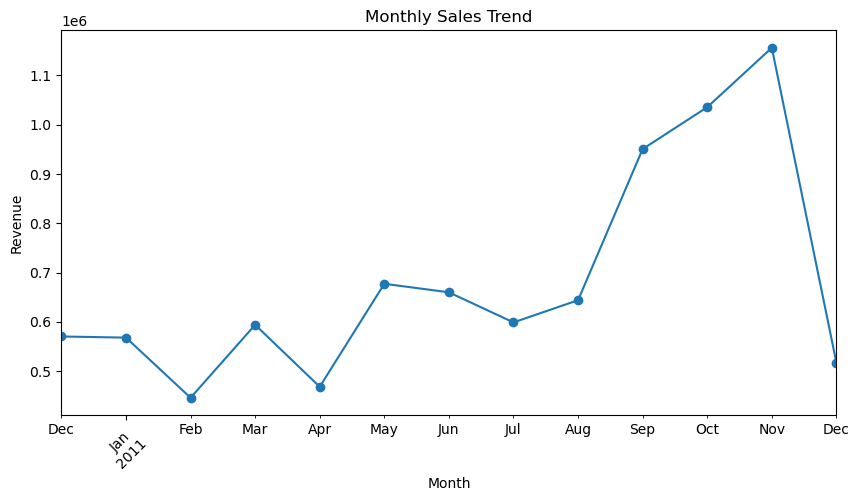

In [5]:
# 3. Sales over time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
sales_over_time = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum()
plt.figure(figsize=(10,5))
sales_over_time.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

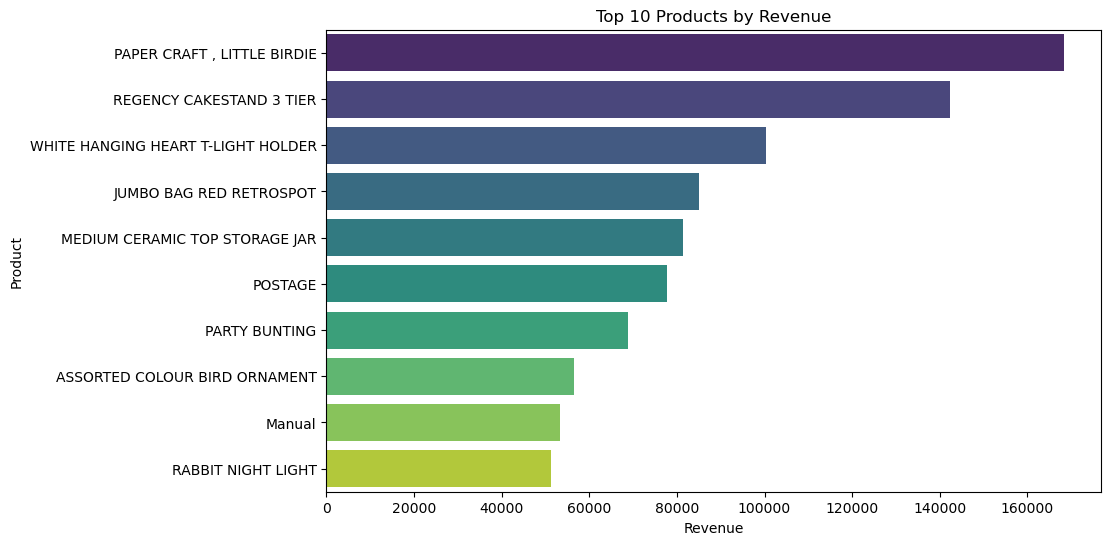

In [6]:
# 4. Top-selling products
top_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

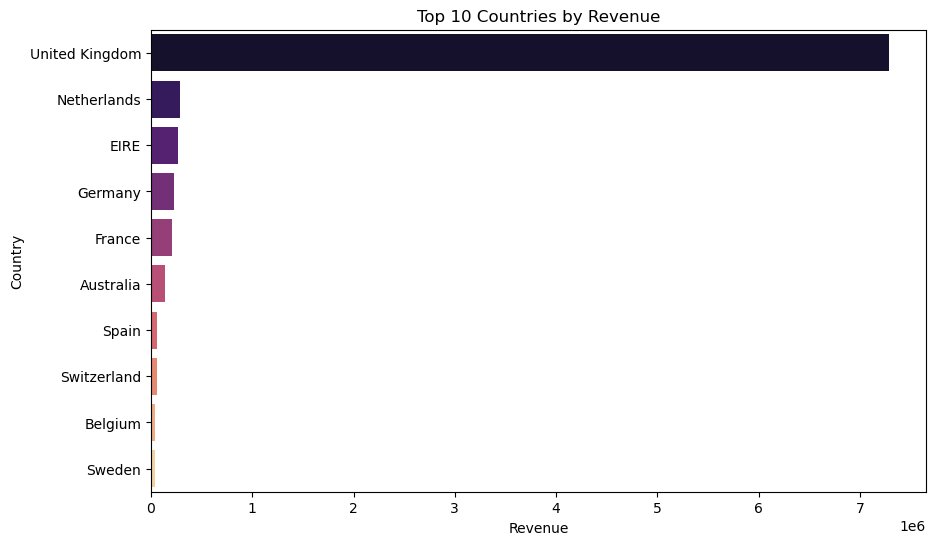

In [7]:
# 5. Sales by country
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette="magma")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

In [8]:
# 6. KPIs

# Total Revenue
total_revenue = df['TotalAmount'].sum()

# Average Order Value (AOV)
order_values = df.groupby('InvoiceNo')['TotalAmount'].sum()
aov = order_values.mean()

# Repeat Purchase Rate (customers with >1 order)
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_rate = (customer_orders > 1).mean() * 100

# Top 10 products contribution
top10_contribution = (top_products.sum() / total_revenue) * 100

print("\n--- KPIs ---")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Average Order Value (AOV): £{aov:,.2f}")
print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")
print(f"Top 10 Products Contribution to Revenue: {top10_contribution:.2f}%")


--- KPIs ---
Total Revenue: £8,887,208.89
Average Order Value (AOV): £479.56
Repeat Purchase Rate: 65.58%
Top 10 Products Contribution to Revenue: 9.96%


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("ecommerce_cleaned.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



--- RFM Head ---
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


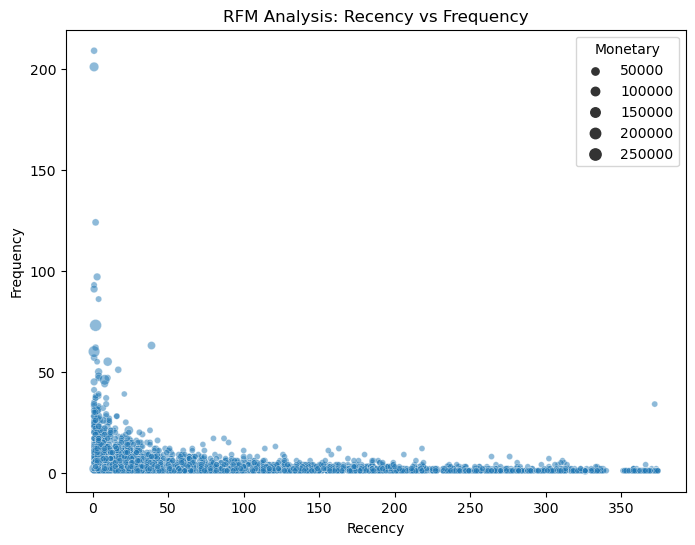

In [16]:
# --- 1. RFM Analysis ---
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalAmount': 'sum'                                     # Monetary
})

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

print("\n--- RFM Head ---")
print(rfm.head())
# Plot Recency vs Frequency
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', size='Monetary', alpha=0.5)
plt.title("RFM Analysis: Recency vs Frequency")
plt.show()

In [17]:
# --- 2. Customer Lifetime Value Proxy ---
clv = rfm['Monetary'].mean() * (rfm['Frequency'].mean())
print(f"\nApprox. Average Customer Lifetime Value (proxy): £{clv:.2f}")



Approx. Average Customer Lifetime Value (proxy): £8752.03


C:\Users\snehs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\snehs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


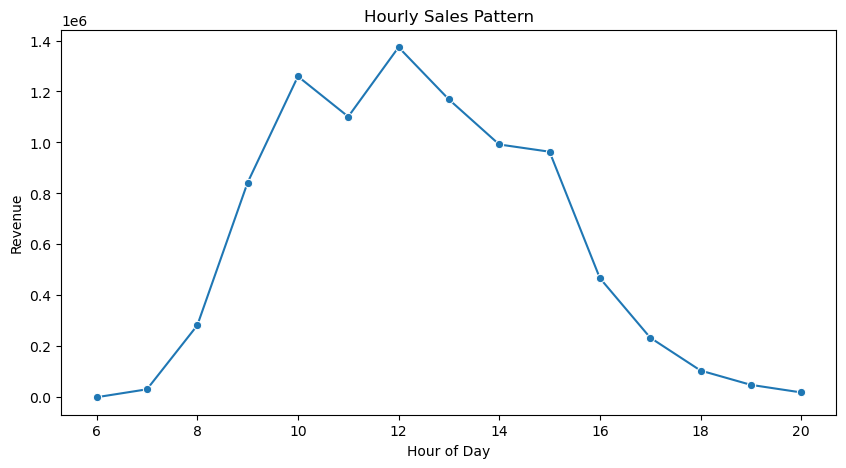

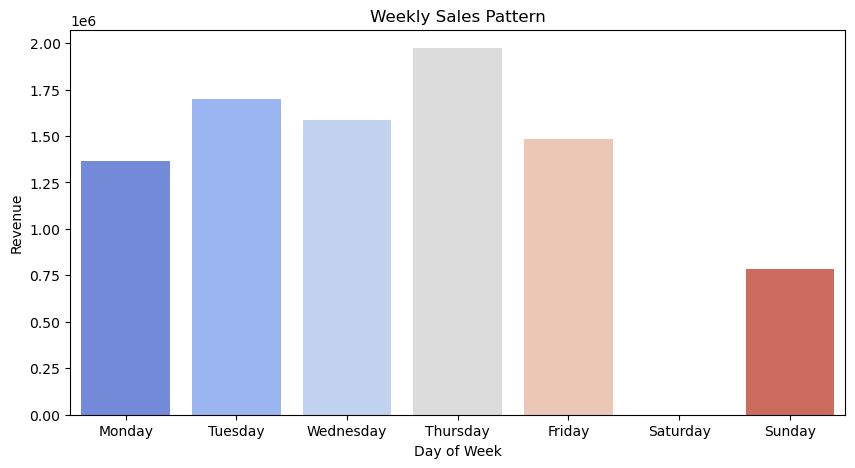

In [19]:
# --- 3. Hourly / Weekly Sales Patterns ---
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# Hourly sales
hourly_sales = df.groupby('Hour')['TotalAmount'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o")
plt.title("Hourly Sales Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.show()

# Weekly sales
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

weekly_sales = df.groupby('Weekday')['TotalAmount'].sum()
weekly_sales = weekly_sales.reindex(order, fill_value=0)  # fill missing days with 0

plt.figure(figsize=(10,5))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette="coolwarm")
plt.title("Weekly Sales Pattern")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.show()


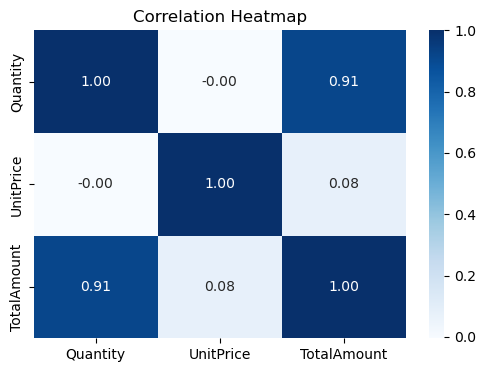

In [20]:
# --- 4. Correlation Heatmap ---
num_cols = df[['Quantity', 'UnitPrice', 'TotalAmount']]
plt.figure(figsize=(6,4))
sns.heatmap(num_cols.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

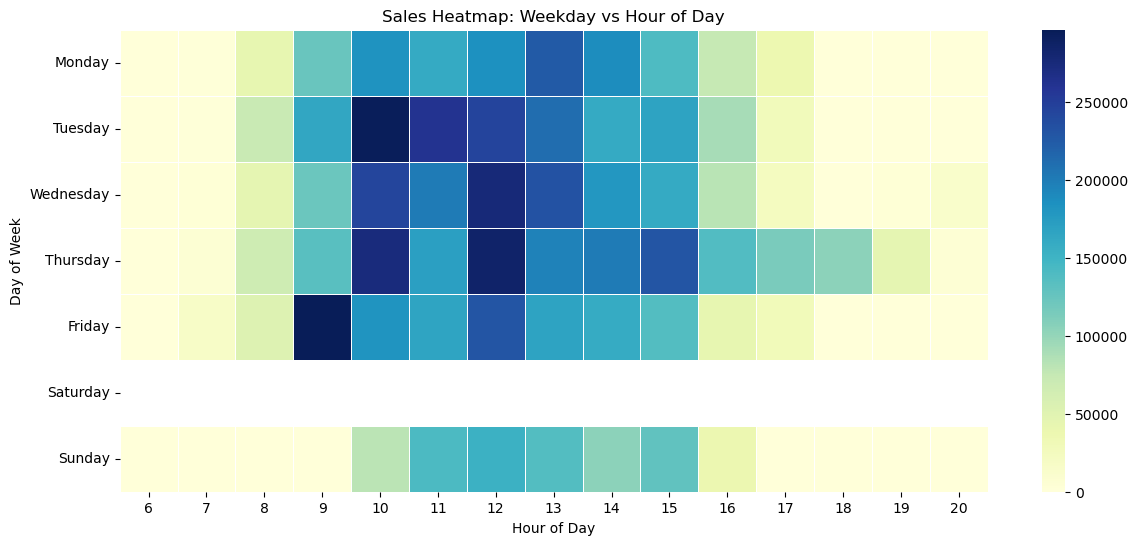

In [23]:
# --- Weekday vs Hour Heatmap ---

# Extract hour and weekday again (if not already done)
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# Pivot table: Revenue by weekday & hour
heatmap_data = df.pivot_table(
    index='Weekday',
    columns='Hour',
    values='TotalAmount',
    aggfunc='sum',
    fill_value=0
)

# Reorder weekdays (so it’s not alphabetical)
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("Sales Heatmap: Weekday vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()
